<img src="https://user-images.githubusercontent.com/43984584/71171315-cf860500-22a0-11ea-8310-34d4bb10a0b4.png" align="left">

## Multiple classification - 항공기 분류

<img src="https://user-images.githubusercontent.com/43984584/71169450-4967bf80-229c-11ea-9254-7dc35ef44c06.png" align="left">

# 개요: Multiple Classification을 통해 항공기를 분류 해보고자 한다.

<img src="https://user-images.githubusercontent.com/43984584/71158495-68a82200-2287-11ea-8494-2247db54af1b.png" align="left">

## 플리커 API를 활용한 사진 download.py

```bash
# Flickr로 사진 검색해서 다운로드하기
# https://medium.com/@adrianmrit/creating-simple-image-datasets-with-flickr-api-2f19c164d82f

from flickrapi import FlickrAPI
from urllib.request import urlretrieve
from pprint import pprint
import os, time, sys

# AP 키 지정하기--- ( ※ 1)
key = "c36c0ec53b612a9face23fd8af97e0a3"
secret = "d7049ed458d2d007"
wait_time = 1 # 대기 시간(초)
SIZES = ["url_o", "url_k", "url_h", "url_l", "url_c"]

# 키워드와 디렉터리 이름 지정해서 다운로드하기 --- ( ※ 2)
def main():
    go_download('qatar airline', 'qatar_airline')
    # go_download('asianaairlines', 'asianaairlines')
    # go_download('koreanair', 'koreanair')


# 사진 사이즈

# url_o: Original (4520 × 3229)
# url_k: Large 2048 (2048 × 1463)
# url_h: Large 1600 (1600 × 1143)
# url_l=: Large 1024 (1024 × 732)
# url_c: Medium 800 (800 × 572)
# url_z: Medium 640 (640 × 457)
# url_m: Medium 500 (500 × 357)
# url_n: Small 320 (320 × 229)
# url_s: Small 240 (240 × 171)
# url_t: Thumbnail (100 × 71)
# url_q: Square 150 (150 × 150)
# url_sq: Square 75 (75 × 75)


# Flickr API로 사진 검색하기 --- (*3)
def go_download(keyword, dir):
    # extras = ','.join(SIZES)
    # print(extras)
    # 저장 경로 지정하기
    savedir = "./data/" + dir
    if not os.path.exists(savedir):
        os.mkdir(savedir)
    # API를 사용해서 다운로드하기 --- (*4)
    flickr = FlickrAPI(key, secret, format='parsed-json')
    res = flickr.photos.search(
      text = keyword,     # 키워드
      per_page = 2000,     # 검색할 개수
      media = 'photos',   # 사진 검색
      sort = "relevance", # 키워드 관련도 순서
      safe_search = 1,    # 안전 검색
      extras = 'url_q, license')
      # extras = extras)

        # 결과 확인하기
    photos = res['photos']
    pprint(photos)
    try:
        for i, photo in enumerate(photos['photo']):
            url = photo["url_q"]
            filepath = savedir + '/' + photo['id'] + '.jpg'
            if os.path.exists(filepath): continue
            print(str(i + 1) + ":download=", url)
            urlretrieve(url, filepath)
            time.sleep(wait_time)
    except:
      import traceback
      traceback.print_exc()

if __name__ == '__main__':
    main()
```


### 구글이미지 다운로드, google_image_download 모듈 활용

<img src="https://user-images.githubusercontent.com/43984584/71159703-7a8ac480-2289-11ea-990d-f69f2874586d.png" align="left">
<img src="https://user-images.githubusercontent.com/43984584/71159892-e0774c00-2289-11ea-82d2-40498c3a860f.png" align="left">

<img src="https://user-images.githubusercontent.com/43984584/71173253-8be1ca00-22a5-11ea-8cb9-e42bb491caf0.png" align="left">

# 데이터 비율
- 70% (Training)
- 20% (Test)
- 10% (Validate)

- 250(Training) / 150(Validation) / 70(Test)

# [Important] 
## 첫 제출이후 (Thursday, 19 December 2019, 23:30) Loss function에 대한 오실레이션을 정복하기 위해 다시 수차례 반복한 결과물 입니다.

# 총 7 번의 학습을 시도했습니다. 아래는 그 학습의 여정의 대한 과정과 결과 입니다. 결과적으로 Loss function에 대한 오실레이션을 줄이기 위해 수많은 기법들을 사용하며 테스트 한 결과 입니다.

<img src="https://user-images.githubusercontent.com/43984584/71291087-e74ead80-23b4-11ea-96af-314dd7a37e44.png" align="left">

# [1번째 모델 학습] 
## 최초에는 데이터가 적었을 때는 아래와 같이 오실레이션이 심하게 나타났다. 
### test: 70 / train: 250 / validation: 150 

<img src="https://user-images.githubusercontent.com/43984584/71173327-c6e3fd80-22a5-11ea-8810-d76cacb948c0.png" align="left">

## 1. 모델 구성

In [2]:

from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # 다중 classficiation 때 사용



Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

## 2. 모델 학습 과정 설정

In [3]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

## 3. 데이터 전처리
1. 사진 파일을 읽습니다.
2. JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩 합니다.
3. 그 다음 부동 소수 타입의 텐서로 변환 합니다.
4. 픽셀 값(0에서 255 사이)의 스케일을 [0,1] 사이로 조정합니다. (신경망은 작은 입력 값을 선호합니다.)

In [4]:
import os

train_dir = './data/multiple/train'
validation_dir = './data/multiple/validation'

print(train_dir)
print(os.listdir(train_dir))

./data/multiple/train
['asiana_airlines', '.DS_Store', 'singapore_airlines', 'qatar_airline', 'korean_air']


## 4. 모델 학습

In [5]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정합니다.
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 
train_generator = train_datagen.flow_from_directory(
    train_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.


Found 1000 images belonging to 4 classes.
Found 606 images belonging to 4 classes.


## early stopping 적용
### 학습 조기 종료를 위해서는 ‘EarlyStopping’이라는 함수를 사용하며 더 이상 개선의 여지가 없을 때 학습을 종료시키는 콜백함수입니다. 콜백함수라는 것 어떤 함수를 수행 시 그 함수에서 내가 지정한 함수를 호출하는 것을 말하며, 여기서는 fit 함수에서 EarlyStopping이라는 콜백함수가 학습 과정 중에 매번 호출됩니다. 먼저 fit 함수에서 EarlyStopping 콜백함수를 지정하는 방법은 다음과 같습니다.

```bash
early_stopping = EarlyStopping()
model.fit(X_train, Y_train, nb_epoch= 1000, callbacks=[early_stopping])
```

- 에포크가 1000으로 지정했더라도 학습 과정에서 EarlyStopping 콜백함수를 호출하여 해당 조건이 되면 학습을 조기 종료시킵니다. EarlyStopping 콜백함수에서 설정할 수 있는 인자는 다음과 같습니다.

```bash
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
```

- monitor : 관찰하고자 하는 항목입니다. ‘val_loss’나 ‘val_acc’가 주로 사용됩니다.
- min_delta : 개선되고 있다고 판단하기 위한 최소 변화량을 나타냅니다. 만약 변화량이 min_delta보다 적은 경우에는 개선이 없다고 판단합니다.
- patience : 개선이 없다고 바로 종료하지 않고 개선이 없는 에포크를 얼마나 기다려 줄 것인 가를 지정합니다. 만약 10이라고 지정하면 개선이 없는 에포크가 - 10번째 지속될 경우 학습일 종료합니다.
- verbose : 얼마나 자세하게 정보를 표시할 것인가를 지정합니다. (0, 1, 2)
- mode : 관찰 항목에 대해 개선이 없다고 판단하기 위한 기준을 지정합니다. 예를 들어 관찰 항목이 ‘val_loss’인 경우에는 감소되는 것이 멈출 때 종료되어야 하므로, ‘min’으로 설정됩니다.
- auto : 관찰하는 이름에 따라 자동으로 지정합니다.
- min : 관찰하고 있는 항목이 감소되는 것을 멈출 때 종료합니다.
- max : 관찰하고 있는 항목이 증가되는 것을 멈출 때 종료합니다.

In [6]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss') # 조기종료 콜백함수 정의

history = model.fit_generator(
    train_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=250 * 6, 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[early_stopping])

Epoch 1/15
   7/1500 [..............................] - ETA: 17:20 - loss: 1.3897 - accuracy: 0.2857

/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1500/1500 [==============================] - 965s 643ms/step - loss: 0.4718 - accuracy: 0.8125 - val_loss: 0.5535 - val_accuracy: 0.7241
Epoch 2/15
1500/1500 [==============================] - 978s 652ms/step - loss: 0.0190 - accuracy: 0.9951 - val_loss: 5.2534 - val_accuracy: 0.7130


In [7]:
# 모델 저장하기
model.save('multiple_classficiation_aircraft_20191219_final.h5')

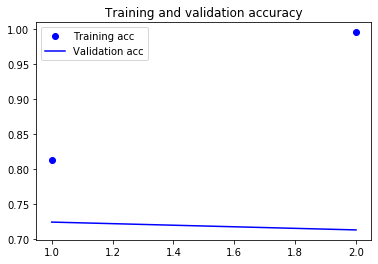

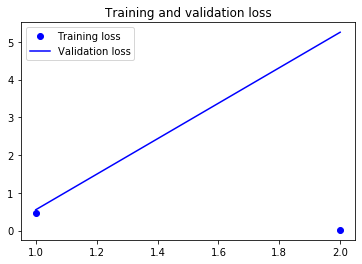

In [10]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5. 모델 평가 
마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다.

In [8]:
test_dir = './data/multiple/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 189 images belonging to 4 classes.


In [9]:
test_loss0, test_acc0 = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc0)

test acc: 0.8359788656234741


## 6. 모델 사용하기
- 기존에 validation에 썻던 데이터가 아닌 test 데이터로 한다.

In [11]:
predict_dir = './data/multiple/test'

predict_generator = test_datagen.flow_from_directory(
    predict_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 189 images belonging to 4 classes.


In [12]:
import numpy as np

print("-- Predict --")
output = model.predict_generator(predict_generator, steps=5)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(predict_generator.class_indices)
print(output)

-- Predict --
{'asiana_airlines': 0, 'korean_air': 1, 'qatar_airline': 2, 'singapore_airlines': 3}
[[0.000 1.000 0.000 0.000]
 [0.000 1.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [0.035 0.000 0.965 0.000]
 [0.000 0.000 1.000 0.000]
 [0.000 0.000 0.994 0.006]
 [0.010 0.000 0.984 0.006]
 [0.000 1.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000]
 [0.999 0.000 0.001 0.000]
 [1.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000]
 [0.000 0.634 0.366 0.000]
 [1.000 0.000 0.000 0.000]
 [0.575 0.000 0.397 0.027]
 [0.257 0.000 0.743 0.000]
 [1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [0.000 0.000 1.000 0.000]
 [0.000 1.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 1.000]
 [1.000 0.000 0.000 0.000]
 [0.000 1.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [1.000 0.000 0.000 0.000]
 [0.015 0.033 0.276 0.676]
 [0.000 0.000 0.999 0.001]
 [0.017 0.000 0.851 0.132]
 [1.000 0.

## 여기까지 하기엔 너무 Early stopping이 빠른것 같습니다. 좀 더 early stopping을 없애고 다시 훈련 해보겠습니다.

# [2번째 모델 학습] 
### - 위 구조와 동일
### - early stopping을 하지 않고 학습

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # 다중 classficiation 때 사용

from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=250 * 6, 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=12,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/12
   4/1500 [..............................] - ETA: 20:29 - loss: 1.4457 - accuracy: 0.2375

/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


1500/1500 [==============================] - 957s 638ms/step - loss: 0.5411 - accuracy: 0.7813 - val_loss: 0.9778 - val_accuracy: 0.6968
Epoch 2/12
1500/1500 [==============================] - 943s 629ms/step - loss: 0.0255 - accuracy: 0.9935 - val_loss: 3.5499 - val_accuracy: 0.6934
Epoch 3/12
1500/1500 [==============================] - 914s 609ms/step - loss: 0.0081 - accuracy: 0.9979 - val_loss: 9.5856 - val_accuracy: 0.6146
Epoch 4/12
1500/1500 [==============================] - 914s 609ms/step - loss: 0.0084 - accuracy: 0.9982 - val_loss: 6.0092 - val_accuracy: 0.6986
Epoch 5/12
1500/1500 [==============================] - 911s 608ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 6.4085 - val_accuracy: 0.6862
Epoch 6/12
1500/1500 [==============================] - 911s 607ms/step - loss: 7.1526e-10 - accuracy: 1.0000 - val_loss: 4.8874 - val_accuracy: 0.6998
Epoch 7/12
1500/1500 [==============================] - 949s 632ms/step - loss: 1.0093e-09 - accuracy: 1.0000 - val_los

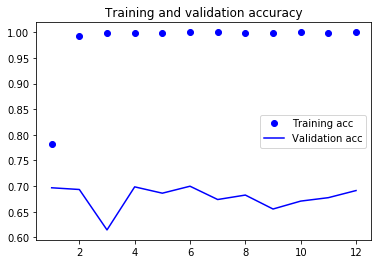

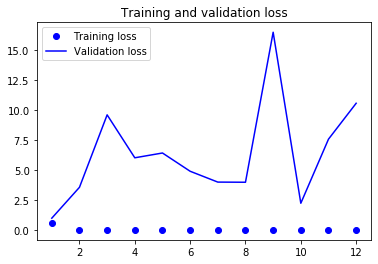

In [14]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5. 모델 평가 
마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다.

In [15]:
test_dir = './data/multiple/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 189 images belonging to 4 classes.


In [16]:
test_loss0, test_acc0 = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc0)

test acc: 0.7989417910575867


## 6. 모델 사용하기
- 기존에 validation에 썻던 데이터가 아닌 test 데이터로 한다.

In [77]:
predict_dir = './data/multiple/test'

predict_generator = test_datagen.flow_from_directory(
    predict_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 189 images belonging to 4 classes.


In [78]:
import numpy as np

print("-- Predict --")
output = model.predict_generator(predict_generator, steps=10)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# print(predict_generator.class_indices)
# print(output)

-- Predict --


## 실제로 학습된 모델을 사용해서 Test 이미지 파일을 이용해 예측을 해보았으나 결과 값이 만족스럽지 못함.

In [79]:
# {'asiana_airlines': 0, 'korean_air': 1, 'qatar_airline': 2, 'singapore_airlines': 3}


import glob
from PIL import Image


predict_dir = './data/multiple/test'
categories_dir = ['asiana_airlines', 'korean_air', 'qatar_airline', 'singapore_airlines']
image_w = 150
image_h = 150

pixels = image_h * image_w * 3

files =[]
for idx, cat in enumerate(categories_dir):
    files_tmp = glob.glob(predict_dir + '/'+ cat + "/*.*")
    
    for i, f in enumerate(files_tmp):
        files.append(f)


# print(files[6])
filenames = []
X = []
cnt = 0

for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

# print(X)
for i in output:
    print(len(output))
    pre_ans = i.argmax()  # 예측 레이블
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "아시아나항공"
    elif pre_ans == 1: pre_ans_str = "대한항공"
    elif pre_ans == 2: pre_ans_str = "카타르항공"    
    elif pre_ans == 3: pre_ans_str = "싱가포르항공"    
    else: pre_ans_str = "?"
    
    if i[0] >= 0.8 : print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    
    cnt += 1
    

189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_62.jpg이미지는 아시아나항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_8.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_9.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_63.jpg이미지는 카타르항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_61.jpg이미지는 카타르항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_49.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_48.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_60.jpg이미지는 아시아나항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_58.jpg이미지는 싱가포르항공로 추정됩니다.
189
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_64.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_65.jpg이미지는 카타르항공로 추정됩니다.
189
189
해당 ./data/multiple/test/asiana_airlines/asiana_airli

## 지금 것도 Overfitting

## Augumentation을 통해 데이터를 각각 250 개를 -> 우선 9185개로 한뒤 만들어진 이미지로 데스트를 해보겠습니다.

In [86]:
# 데이터 불리기 설정

datagen = ImageDataGenerator(
    rotation_range=15, # 랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.1, # 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높에 대한 비율)
    height_shift_range=0.1,
    shear_range=0.1, # 랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.1, # 랜덤하게 사진을 확대할 범위
    horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어 풍경/인물 사진)
    vertical_flip=True,
    fill_mode='nearest') # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

In [82]:
predict_dir = './data/multiple/train'
categories_dir = ['asiana_airlines', 'korean_air', 'qatar_airline', 'singapore_airlines']

files =[]
for idx, cat in enumerate(categories_dir):
    files_tmp = glob.glob(predict_dir + '/'+ cat + "/*.*")
    
    for i, f in enumerate(files_tmp):
        files.append(f)

# print(files)
print(len(files))

1000


In [72]:
from keras.preprocessing import image

In [96]:
print('korean'in files[256])

True


/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


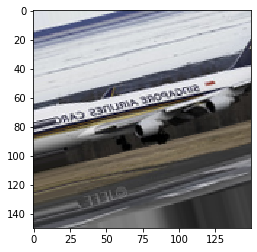

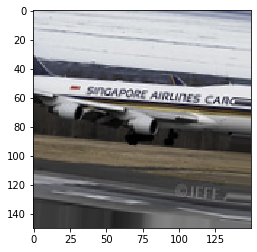

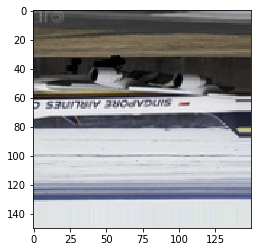

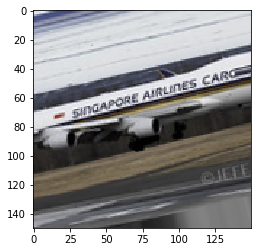

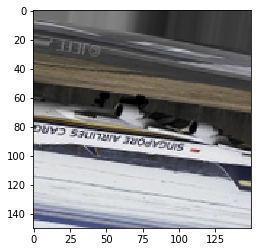

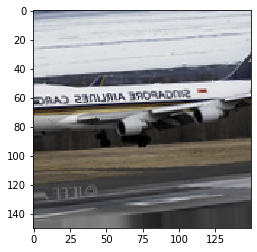

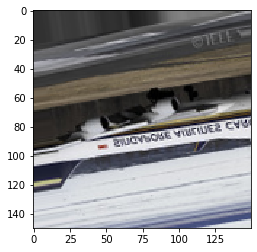

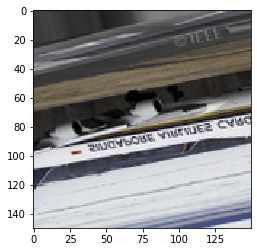

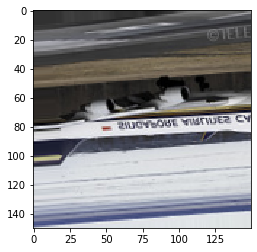

In [ ]:
# 증식할 이미지를 선택합니다.

# img_path = fname[3] # 증식할 이미지를 선택

save_directory = []
save_with_prefix = []

for idx, s in enumerate(files):

        img = image.load_img(s, target_size=(150,150)) # 이미지를 읽고 크기를 변경

        x = image.img_to_array(img) # (150, 150,3) 크기의 넘파이 배열로 변환
        x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환 합니다.
        
        i = 0
        
        if 'asiana'in s:
            save_directory = "/asiana"
            save_with_prefix = "asiana_"
        elif 'korean'in s:
            save_directory = "/korean"
            save_with_prefix = "korean_"
        elif 'qatar'in s:
            save_directory = "/qatar"
            save_with_prefix = "qatar_"
        elif 'singapore'in s:
            save_directory = "/singapore"
            save_with_prefix = "singapore"
        

        # 랜덤하게 변환된 이미지 배치를 생성합니다. 무한 반복되기 때문에 어느 지점에서 중지 해야 합니다.
        for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/multiple/train/preview' + save_directory, save_prefix=save_with_prefix, save_format='jpg'):
            plt.figure(i)
            imgplot = plt.imshow(image.array_to_img(batch[0]))
            i += 1
            if i == 100:
                break


# [3번째 모델 학습] 

## [1번째 시도] 에 진행했던 아키텍쳐 구조에서 Training 파일만 늘려봄

In [1]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout


model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) # 다중 classficiation 때 사용

Using TensorFlow backend.


In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [6]:
import os
train_aug_dir = './data/multiple/train/preview'
validation_dir = './data/multiple/validation'


print(os.listdir(train_aug_dir))

['korean', '.DS_Store', 'qatar', 'singapore', 'asiana']


In [5]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['accuracy'])

In [7]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정합니다.
train_aug_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255) 

train__aug_generator = train_aug_datagen.flow_from_directory(
    train_aug_dir, #train_aug 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.


Found 36779 images belonging to 4 classes.
Found 606 images belonging to 4 classes.


In [8]:

history = model.fit_generator(
    train__aug_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=460, # 이미지가 9200개 정도고, batch size가 20 이므로 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,)

Epoch 1/15
459/460 [============================>.] - ETA: 0s - loss: 1.1121 - accuracy: 0.4870

/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


460/460 [==============================] - 192s 417ms/step - loss: 1.1120 - accuracy: 0.4868 - val_loss: 1.0641 - val_accuracy: 0.6298
Epoch 2/15
460/460 [==============================] - 196s 425ms/step - loss: 0.8036 - accuracy: 0.6580 - val_loss: 1.1083 - val_accuracy: 0.6399
Epoch 3/15
460/460 [==============================] - 197s 427ms/step - loss: 0.6495 - accuracy: 0.7259 - val_loss: 0.6165 - val_accuracy: 0.6897
Epoch 4/15
460/460 [==============================] - 198s 430ms/step - loss: 0.5570 - accuracy: 0.7753 - val_loss: 1.3472 - val_accuracy: 0.7274
Epoch 5/15
460/460 [==============================] - 198s 430ms/step - loss: 0.4695 - accuracy: 0.8183 - val_loss: 0.4667 - val_accuracy: 0.7510
Epoch 6/15
460/460 [==============================] - 166s 361ms/step - loss: 0.3854 - accuracy: 0.8547 - val_loss: 1.0003 - val_accuracy: 0.7961
Epoch 7/15
460/460 [==============================] - 186s 404ms/step - loss: 0.3415 - accuracy: 0.8790 - val_loss: 0.7185 - val_accura

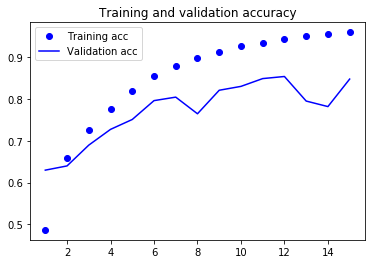

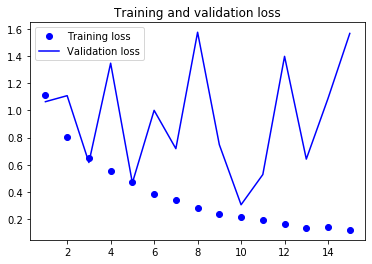

In [9]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 해석: Validation acc로 괜찮으나 loss function의 결과를 보니 전혀 training 데이터만 늘어난다고 해서 성능이 잘 나오는 것은  아니다.
## 그렇다면 Validation data를 늘려보겠습니다.

In [12]:
# 데이터 불리기 설정
from keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=15, # 랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.1, # 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높에 대한 비율)
    height_shift_range=0.1,
    shear_range=0.1, # 랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.1, # 랜덤하게 사진을 확대할 범위
    horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어 풍경/인물 사진)
    vertical_flip=True,
    fill_mode='nearest') # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

In [13]:
predict_v_dir = './data/multiple/validation'
categories_dir = ['asiana_airlines', 'korean_air', 'qatar_airline', 'singapore_airlines']

files =[]
for idx, cat in enumerate(categories_dir):
    files_tmp = glob.glob(predict_v_dir + '/'+ cat + "/*.*")
    
    for i, f in enumerate(files_tmp):
        files.append(f)

# print(files)
print(len(files))

607


/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


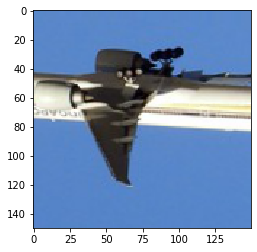

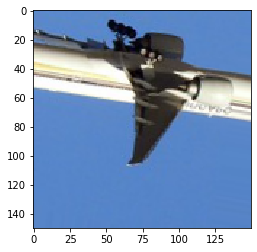

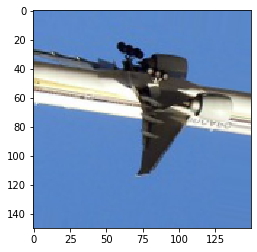

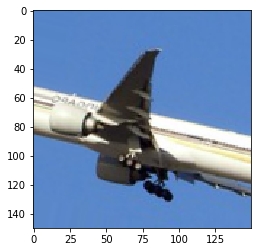

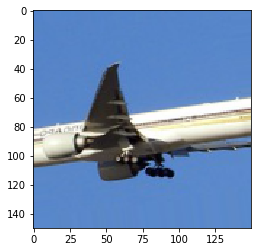

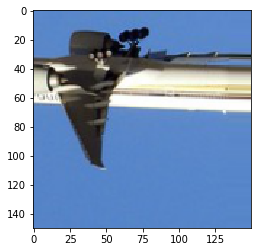

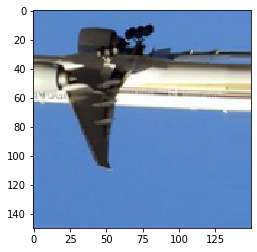

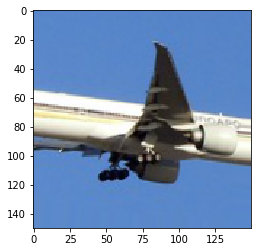

In [14]:
from keras.preprocessing import image

# 증식할 이미지를 선택합니다.

# img_path = fname[3] # 증식할 이미지를 선택

save_directory = []
save_with_prefix = []

for idx, s in enumerate(files):

        img = image.load_img(s, target_size=(150,150)) # 이미지를 읽고 크기를 변경

        x = image.img_to_array(img) # (150, 150,3) 크기의 넘파이 배열로 변환
        x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환 합니다.
        
        i = 0
        
        if 'asiana'in s:
            save_directory = "/asiana"
            save_with_prefix = "asiana_"
        elif 'korean'in s:
            save_directory = "/korean"
            save_with_prefix = "korean_"
        elif 'qatar'in s:
            save_directory = "/qatar"
            save_with_prefix = "qatar_"
        elif 'singapore'in s:
            save_directory = "/singapore"
            save_with_prefix = "singapore"
        

        # 랜덤하게 변환된 이미지 배치를 생성합니다. 무한 반복되기 때문에 어느 지점에서 중지 해야 합니다.
        for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/multiple/validation/preview' + save_directory, save_prefix=save_with_prefix, save_format='jpg'):
            plt.figure(i)
            imgplot = plt.imshow(image.array_to_img(batch[0]))
            i += 1
            if i == 8: # 8개 씩 늘려서 900개 정도 되겠금 설정
                break

# [4번째 모델 학습] 

## 4번째는 아래와 같은 조치를 취함.
### 1) Validation 데이터를 augmentation (120 -> 900)
### 2) 학습해야 할 파라미터 수 를 줄임(Trainable params: 3,454,660 -> 87,132) 
### 3) initialization을 추가
### 4) optimizer 변경 (RMSprop -> Adam)
### 5) Batch size 변경 (20 -> 48)

In [75]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout


model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), strides=1, activation='relu',kernel_initializer ="glorot_uniform" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), strides=1, activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2),strides=2))
model.add(Dropout(0.3))

# model.add(layers.Conv2D(128,(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(4, activation='softmax',kernel_initializer ="glorot_uniform")) # 다중 classficiation 때 사용

In [76]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 72, 72, 80)        11600     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 36, 36, 80)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 36, 36, 80)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 34, 34, 40)      

In [77]:
import os
train_aug_dir = './data/multiple/train/preview'
validation_aug_dir = './data/multiple/validation/preview'


print(os.listdir(train_aug_dir))

['korean', '.DS_Store', 'qatar', 'singapore', 'asiana']


In [78]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.001),
#              optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [79]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정합니다.
train_aug_datagen = ImageDataGenerator(rescale=1./255) 
test_aug_datagen = ImageDataGenerator(rescale=1./255) 

train__aug_generator = train_aug_datagen.flow_from_directory(
    train_aug_dir, #train_aug 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_aug_datagen.flow_from_directory(
    validation_aug_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.


Found 36779 images belonging to 4 classes.
Found 4552 images belonging to 4 classes.


## Training, Validation 데이터 모두 늘었습니다.

In [80]:
history = model.fit_generator(
    train__aug_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=200, # 이미지가 9200개 정도고, batch size가 20 이므로 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=30,
    validation_data=validation_generator,
    validation_steps=5,shuffle=True)

Epoch 1/30
200/200 [==============================] - 112s 561ms/step - loss: 1.2660 - accuracy: 0.3726 - val_loss: 1.0817 - val_accuracy: 0.5917
Epoch 2/30
200/200 [==============================] - 114s 570ms/step - loss: 0.8939 - accuracy: 0.6276 - val_loss: 1.0248 - val_accuracy: 0.6500
Epoch 3/30
200/200 [==============================] - 111s 555ms/step - loss: 0.6859 - accuracy: 0.7229 - val_loss: 0.8340 - val_accuracy: 0.7125
Epoch 4/30
200/200 [==============================] - 109s 547ms/step - loss: 0.5342 - accuracy: 0.8032 - val_loss: 0.6599 - val_accuracy: 0.7417
Epoch 5/30
200/200 [==============================] - 110s 551ms/step - loss: 0.4229 - accuracy: 0.8584 - val_loss: 0.5203 - val_accuracy: 0.8167
Epoch 6/30
200/200 [==============================] - 111s 554ms/step - loss: 0.3962 - accuracy: 0.8649 - val_loss: 1.0343 - val_accuracy: 0.8125
Epoch 7/30
200/200 [==============================] - 110s 550ms/step - loss: 0.3528 - accuracy: 0.8749 - val_loss: 0.5234 -

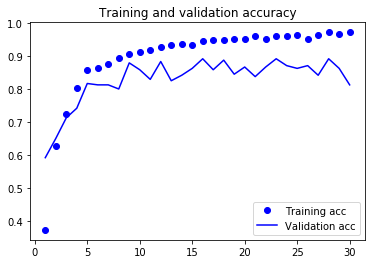

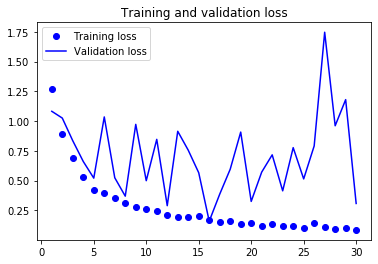

In [81]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 해석: Loss function의 진폭의 앞의 경우들 보단 줄었으나 25 epoch 이후 다시 급격하게 상승. 아직도 Loss function에 문제가 해결이 되지 않음.

# [5번째 모델 학습]

## 아래와 같이 조치를 취함
### 1) Dropout 가중치도 Cov3만 좀 더 늘림(0.3 -> 0.5) 
### 2) kernel_regularizer와 Batch norm을 사용
### 3) Adam lr(0.001 -> 0.0001) 


In [90]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu',kernel_initializer ="glorot_uniform" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))

# model.add(layers.Conv2D(128,(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(Dropout(0.3))

# 마지막 Layer에 input 되기 전에 Batch norm을 주어서 weight imbalance를 막는다.
model.add(BatchNormalization(axis=1))
model.add(layers.Dense(4, activation='softmax',kernel_initializer ="glorot_uniform")) # 다중 classficiation 때 사용

In [91]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 34, 34, 32)      

In [92]:
import os
train_aug_dir = './data/multiple/train/preview'
validation_aug_dir = './data/multiple/validation/preview'


print(os.listdir(train_aug_dir))

['korean', '.DS_Store', 'qatar', 'singapore', 'asiana']


In [93]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
#              optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [94]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정합니다.
train_aug_datagen = ImageDataGenerator(rescale=1./255) 
test_aug_datagen = ImageDataGenerator(rescale=1./255) 

train__aug_generator = train_aug_datagen.flow_from_directory(
    train_aug_dir, #train_aug 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_aug_datagen.flow_from_directory(
    validation_aug_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.


Found 36779 images belonging to 4 classes.
Found 4552 images belonging to 4 classes.


In [95]:
history = model.fit_generator(
    train__aug_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=200, # 이미지가 9200개 정도고, batch size가 20 이므로 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=15,
    validation_data=validation_generator,
    validation_steps=5,shuffle=True)

Epoch 1/15
200/200 [==============================] - 75s 376ms/step - loss: 1.8563 - accuracy: 0.2567 - val_loss: 1.4242 - val_accuracy: 0.2542
Epoch 2/15
200/200 [==============================] - 77s 387ms/step - loss: 1.7447 - accuracy: 0.2658 - val_loss: 1.4848 - val_accuracy: 0.2417
Epoch 3/15
200/200 [==============================] - 75s 375ms/step - loss: 1.5533 - accuracy: 0.3202 - val_loss: 1.4242 - val_accuracy: 0.3750
Epoch 4/15
200/200 [==============================] - 76s 380ms/step - loss: 1.4182 - accuracy: 0.3732 - val_loss: 1.3632 - val_accuracy: 0.3917
Epoch 5/15
200/200 [==============================] - 75s 377ms/step - loss: 1.2663 - accuracy: 0.4288 - val_loss: 1.2858 - val_accuracy: 0.4042
Epoch 6/15
200/200 [==============================] - 76s 380ms/step - loss: 1.1263 - accuracy: 0.5103 - val_loss: 1.0069 - val_accuracy: 0.5833
Epoch 7/15
200/200 [==============================] - 75s 377ms/step - loss: 1.0380 - accuracy: 0.5594 - val_loss: 1.1420 - val_ac

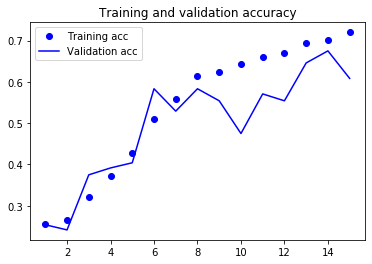

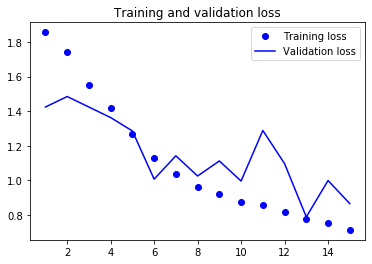

In [96]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 해석: loss function이 앞전 보다 훨씬 안정적임. 그렇다면 epoch만 더 늘리면 될것 같은 생각이 듬.

# [6번째 모델 학습]

## 아래와 같이 조치를 취함
### 1) 5번째 모델 학습과 동일한 구조에서 epochs 수만 30 정도로 늘려봄


In [97]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu',kernel_initializer ="glorot_uniform" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))

# model.add(layers.Conv2D(128,(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(Dropout(0.3))

# 마지막 Layer에 input 되기 전에 Batch norm을 주어서 weight imbalance를 막는다.
model.add(BatchNormalization(axis=1))
model.add(layers.Dense(4, activation='softmax',kernel_initializer ="glorot_uniform")) # 다중 classficiation 때 사용

In [98]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 34, 34, 32)      

In [99]:
import os
train_aug_dir = './data/multiple/train/preview'
validation_aug_dir = './data/multiple/validation/preview'


print(os.listdir(train_aug_dir))

['korean', '.DS_Store', 'qatar', 'singapore', 'asiana']


In [100]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
#              optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [101]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정합니다.
train_aug_datagen = ImageDataGenerator(rescale=1./255) 
test_aug_datagen = ImageDataGenerator(rescale=1./255) 

train__aug_generator = train_aug_datagen.flow_from_directory(
    train_aug_dir, #train_aug 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_aug_datagen.flow_from_directory(
    validation_aug_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.


Found 36779 images belonging to 4 classes.
Found 4552 images belonging to 4 classes.


In [102]:
history = model.fit_generator(
    train__aug_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=200, # 이미지가 9200개 정도고, batch size가 20 이므로 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=30,
    validation_data=validation_generator,
    validation_steps=5,shuffle=True)

Epoch 1/30
200/200 [==============================] - 77s 385ms/step - loss: 1.8045 - accuracy: 0.2646 - val_loss: 1.4785 - val_accuracy: 0.2542
Epoch 2/30
200/200 [==============================] - 74s 371ms/step - loss: 1.6186 - accuracy: 0.3097 - val_loss: 1.3238 - val_accuracy: 0.3042
Epoch 3/30
200/200 [==============================] - 72s 362ms/step - loss: 1.4863 - accuracy: 0.3458 - val_loss: 1.6726 - val_accuracy: 0.2458
Epoch 4/30
200/200 [==============================] - 73s 365ms/step - loss: 1.3889 - accuracy: 0.3779 - val_loss: 1.6797 - val_accuracy: 0.2750
Epoch 5/30
200/200 [==============================] - 74s 372ms/step - loss: 1.2847 - accuracy: 0.4143 - val_loss: 1.3811 - val_accuracy: 0.2500
Epoch 6/30
200/200 [==============================] - 77s 385ms/step - loss: 1.1587 - accuracy: 0.4831 - val_loss: 1.1772 - val_accuracy: 0.3667
Epoch 7/30
200/200 [==============================] - 78s 388ms/step - loss: 1.0693 - accuracy: 0.5342 - val_loss: 1.1247 - val_ac

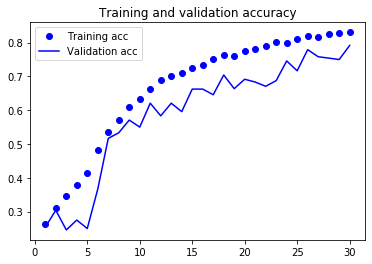

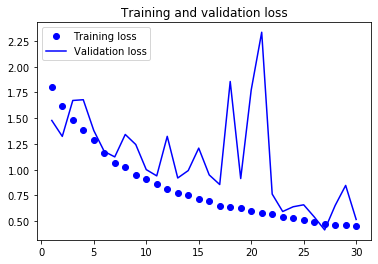

In [103]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# [7번째 모델 학습]

## 아래와 같이 조치를 취함
### 1) 5번과 동일한 구조
### 2) Validation data augmentation -> training 데이터와 근접하게 

In [134]:
# 데이터 불리기 설정
from keras.preprocessing.image import ImageDataGenerator
import glob
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=15, # 랜덤하게 사진을 회전시킬 각도 범위(0~180사이)
    width_shift_range=0.1, # 사진을 수평과 수직으로 랜덤하게 평행이동 시킬 범위(전체 너비와 높에 대한 비율)
    height_shift_range=0.1,
    shear_range=0.1, # 랜덤하게 전단 변환을 적용할 각도 범위
    zoom_range=0.1, # 랜덤하게 사진을 확대할 범위
    horizontal_flip=True, # 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어 풍경/인물 사진)
    vertical_flip=True,
    fill_mode='nearest') # 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략

In [132]:
predict_v_dir = './data/multiple/validation'
categories_dir = ['asiana_airlines', 'korean_air', 'qatar_airline', 'singapore_airlines']

files =[]
for idx, cat in enumerate(categories_dir):
    files_tmp = glob.glob(predict_v_dir + '/'+ cat + "/*.*")
    
    for i, f in enumerate(files_tmp):
        files.append(f)

# print(files)
print(len(files))

607


/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


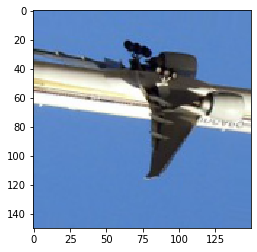

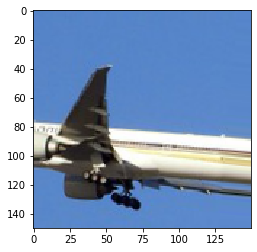

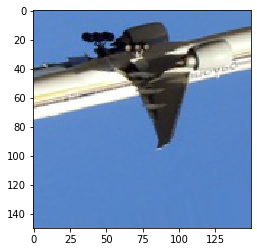

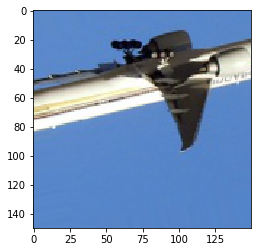

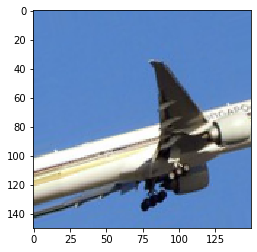

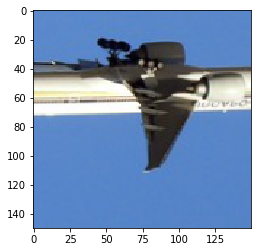

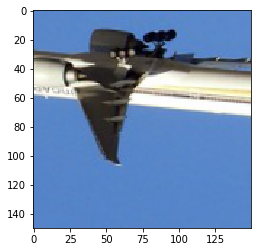

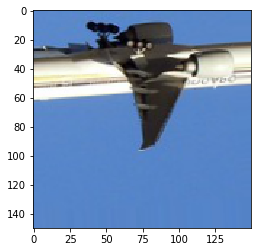

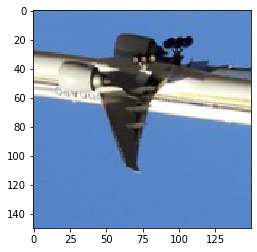

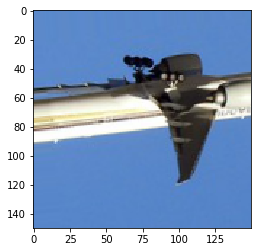

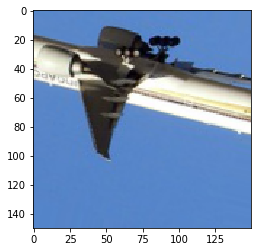

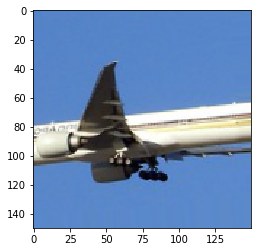

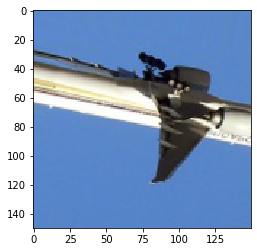

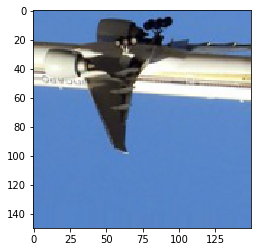

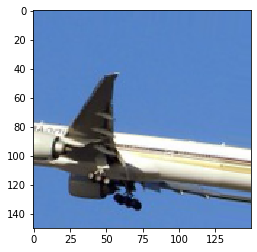

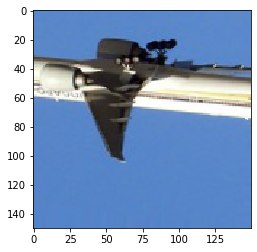

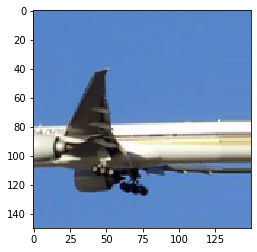

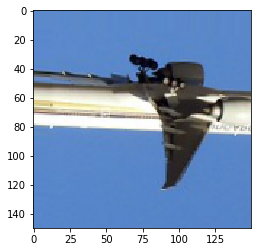

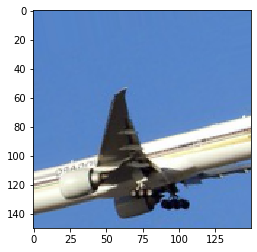

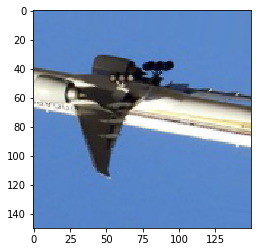

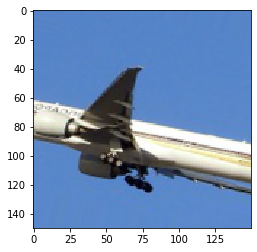

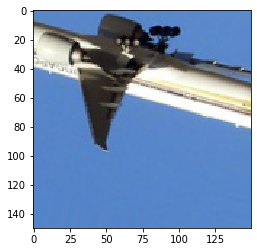

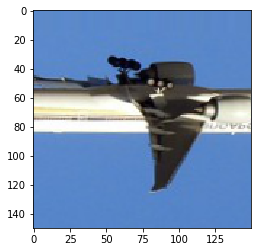

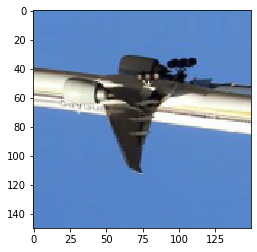

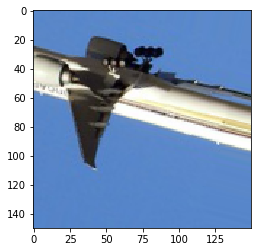

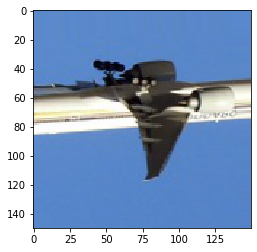

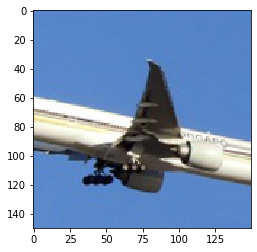

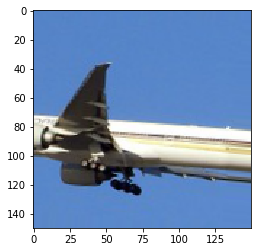

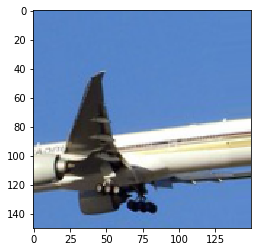

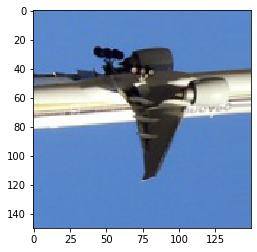

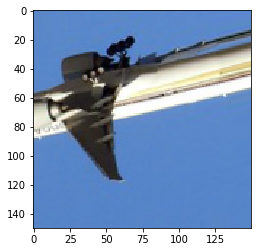

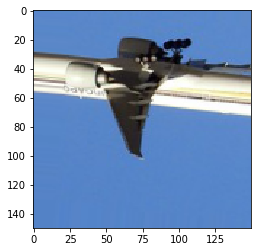

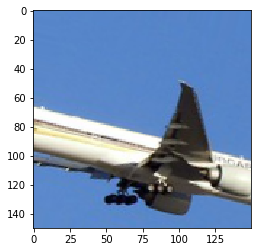

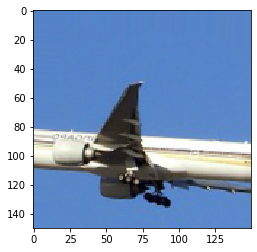

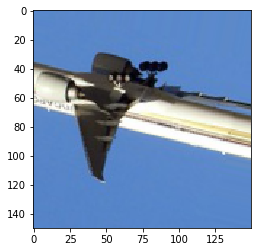

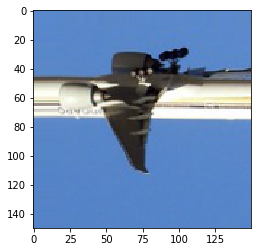

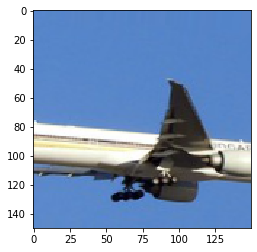

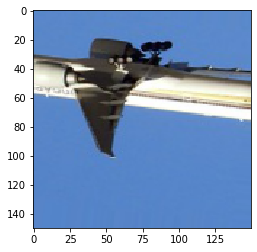

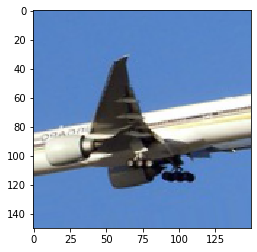

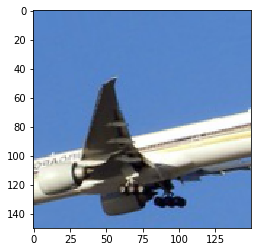

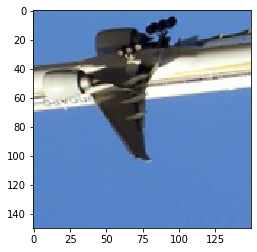

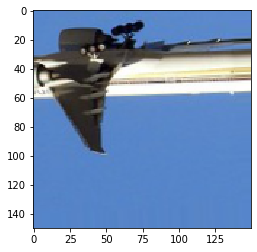

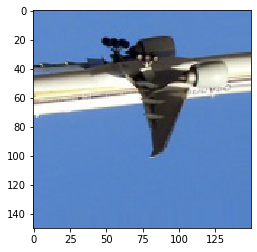

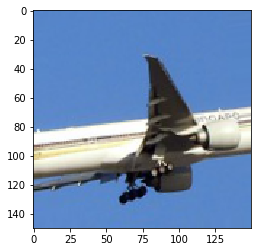

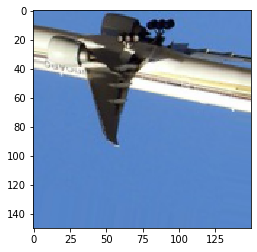

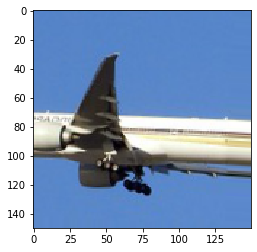

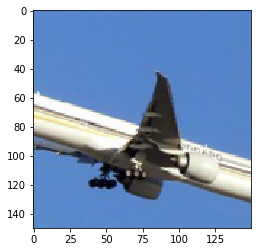

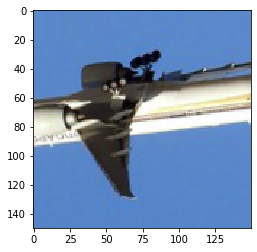

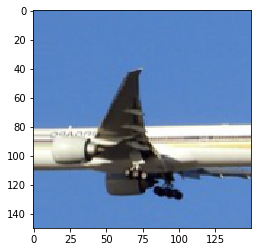

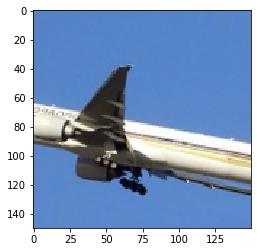

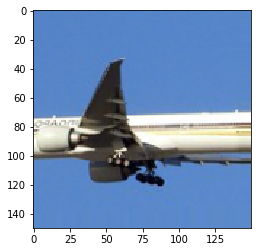

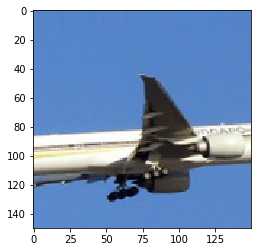

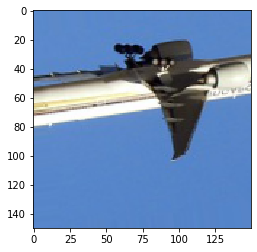

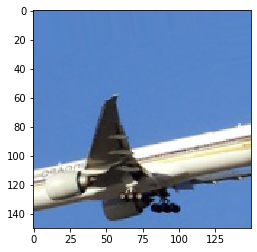

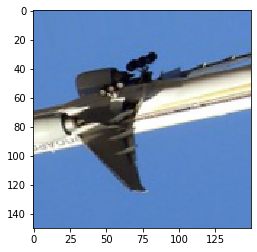

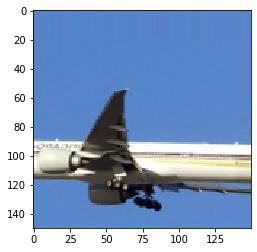

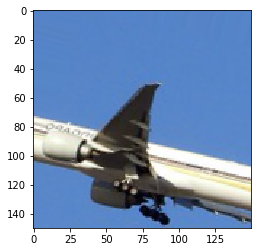

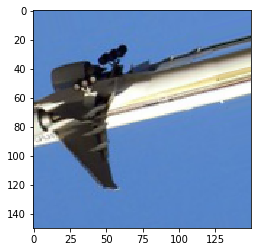

In [133]:
from keras.preprocessing import image

# 증식할 이미지를 선택합니다.

# img_path = fname[3] # 증식할 이미지를 선택

save_directory = []
save_with_prefix = []

for idx, s in enumerate(files):

        img = image.load_img(s, target_size=(150,150)) # 이미지를 읽고 크기를 변경

        x = image.img_to_array(img) # (150, 150,3) 크기의 넘파이 배열로 변환
        x = x.reshape((1,) + x.shape) # (1, 150, 150, 3) 크기로 변환 합니다.
        
        i = 0
        
        if 'asiana'in s:
            save_directory = "/asiana"
            save_with_prefix = "asiana_"
        elif 'korean'in s:
            save_directory = "/korean"
            save_with_prefix = "korean_"
        elif 'qatar'in s:
            save_directory = "/qatar"
            save_with_prefix = "qatar_"
        elif 'singapore'in s:
            save_directory = "/singapore"
            save_with_prefix = "singapore"
        

        # 랜덤하게 변환된 이미지 배치를 생성합니다. 무한 반복되기 때문에 어느 지점에서 중지 해야 합니다.
        for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/multiple/validation/preview' + save_directory, save_prefix=save_with_prefix, save_format='jpg'):
            plt.figure(i)
            imgplot = plt.imshow(image.array_to_img(batch[0]))
            i += 1
            if i == 58: # 8개 씩 늘려서 900개 정도 되겠금 설정
                break

In [143]:
from keras import models
from keras import layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization


model = models.Sequential()
model.add(layers.Conv2D(16,(3,3), activation='relu',kernel_initializer ="glorot_uniform" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(32,(3,3), activation='relu',kernel_initializer ="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.5))

# model.add(layers.Conv2D(128,(3,3), activation='relu'))
# model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(Dropout(0.3))

# 마지막 Layer에 input 되기 전에 Batch norm을 주어서 weight imbalance를 막는다.
model.add(BatchNormalization(axis=1))
model.add(layers.Dense(4, activation='softmax',kernel_initializer ="glorot_uniform")) # 다중 classficiation 때 사용

In [144]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
dropout_60 (Dropout)         (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 34, 34, 32)      

In [145]:
import os
train_aug_dir = './data/multiple/train/preview'
validation_aug_dir = './data/multiple/validation/preview'


print(os.listdir(train_aug_dir))

['korean', '.DS_Store', 'qatar', 'singapore', 'asiana']


In [146]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 조정합니다.
train_aug_datagen = ImageDataGenerator(rescale=1./255) 
test_aug_datagen = ImageDataGenerator(rescale=1./255) 

train__aug_generator = train_aug_datagen.flow_from_directory(
    train_aug_dir, #train_aug 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_aug_datagen.flow_from_directory(
    validation_aug_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=48,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.


Found 36779 images belonging to 4 classes.
Found 23484 images belonging to 4 classes.


In [147]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adam(lr=0.0001),
#              optimizer=optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [148]:
history = model.fit_generator(
    train__aug_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=200, # 이미지가 9200개 정도고, batch size가 20 이므로 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=50,
    validation_data=validation_generator,
    validation_steps=5,shuffle=True)

Epoch 1/50
200/200 [==============================] - 91s 455ms/step - loss: 1.8788 - accuracy: 0.2557 - val_loss: 1.3785 - val_accuracy: 0.2667
Epoch 2/50
200/200 [==============================] - 94s 470ms/step - loss: 1.7210 - accuracy: 0.2802 - val_loss: 1.4714 - val_accuracy: 0.2958
Epoch 3/50
200/200 [==============================] - 92s 462ms/step - loss: 1.5810 - accuracy: 0.3204 - val_loss: 1.3846 - val_accuracy: 0.3917
Epoch 4/50
200/200 [==============================] - 92s 462ms/step - loss: 1.4009 - accuracy: 0.3877 - val_loss: 1.5558 - val_accuracy: 0.2375
Epoch 5/50
200/200 [==============================] - 92s 460ms/step - loss: 1.1655 - accuracy: 0.4783 - val_loss: 1.2059 - val_accuracy: 0.4792
Epoch 6/50
200/200 [==============================] - 89s 447ms/step - loss: 1.0679 - accuracy: 0.5507 - val_loss: 1.1670 - val_accuracy: 0.5750
Epoch 7/50
200/200 [==============================] - 90s 451ms/step - loss: 0.9822 - accuracy: 0.5978 - val_loss: 0.9019 - val_ac

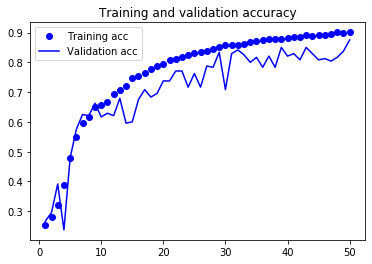

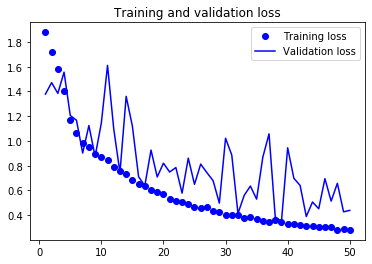

In [149]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 5. 모델 평가 
마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다.

In [151]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_dir = './data/multiple/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 189 images belonging to 4 classes.


In [152]:
test_loss0, test_acc0 = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc0)

test acc: 0.8306878209114075


## 정확도 83%

## 6. 모델 사용하기
- 기존에 validation에 썻던 데이터가 아닌 test 데이터로 한다.

In [153]:
predict_dir = './data/multiple/test'

predict_generator = test_datagen.flow_from_directory(
    predict_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

Found 189 images belonging to 4 classes.


In [154]:
import numpy as np

print("-- Predict --")
output = model.predict_generator(predict_generator, steps=10)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
# print(predict_generator.class_indices)
# print(output)

-- Predict --


In [155]:
# {'asiana_airlines': 0, 'korean_air': 1, 'qatar_airline': 2, 'singapore_airlines': 3}


import glob
from PIL import Image


predict_dir = './data/multiple/test'
categories_dir = ['asiana_airlines', 'korean_air', 'qatar_airline', 'singapore_airlines']
image_w = 150
image_h = 150

pixels = image_h * image_w * 3

files =[]
for idx, cat in enumerate(categories_dir):
    files_tmp = glob.glob(predict_dir + '/'+ cat + "/*.*")
    
    for i, f in enumerate(files_tmp):
        files.append(f)


# print(files[6])
filenames = []
X = []
cnt = 0

for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

# print(X)
for i in output:
    print(len(output))
    pre_ans = i.argmax()  # 예측 레이블
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "아시아나항공"
    elif pre_ans == 1: pre_ans_str = "대한항공"
    elif pre_ans == 2: pre_ans_str = "카타르항공"    
    elif pre_ans == 3: pre_ans_str = "싱가포르항공"    
    else: pre_ans_str = "?"
    
    if i[0] >= 0.8 : print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    
    cnt += 1
    

189
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_8.jpg이미지는 대한항공으로 추정됩니다.
189
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_63.jpg이미지는 아시아나항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_61.jpg이미지는 대한항공으로 추정됩니다.
189
189
189
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_58.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_70.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_64.jpg이미지는 대한항공으로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_65.jpg이미지는 싱가포르항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_59.jpg이미지는 카타르항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_67.jpg이미지는 아시아나항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_66.jpg이미지는 아시아나항공로 추정됩니다.
189
189
해당 ./data/multiple/test/asiana_airlines/asiana_airlines_29.jpg이미지는 아시아나항공로 추정됩니다.
189
해당 ./data/multiple/test/asiana_ai

## 모델 사용하기: 실제로 학습된 모델을 사용해서 Test 이미지 파일을 이용해 예측까지 해보았다. 비행기의 기종을 구분하는건 사실상 쉽지 않다는 걸 다시 한번 배울 수 있었다.

# Sumamary

<img src="https://user-images.githubusercontent.com/43984584/71291087-e74ead80-23b4-11ea-96af-314dd7a37e44.png" align="left">

-----

# Appendix

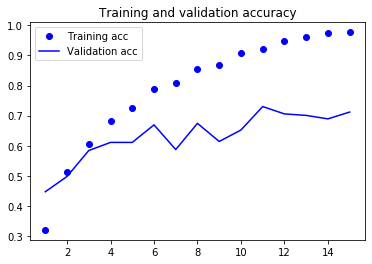

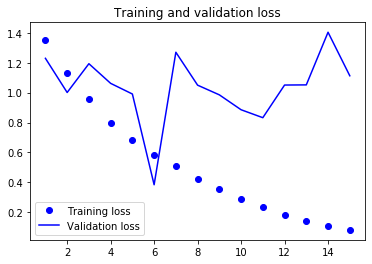

In [7]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 오실레이션이 발생한다. 우선 LR을 0.001 > 0.0001로 변경 해 본다.

In [8]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.0001),
             metrics=['accuracy'])

In [9]:
history = model.fit_generator(
    train_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=100, 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/15


/Users/jihyun/miniconda3/envs/datascience/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:802: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


100/100 [==============================] - 52s 516ms/step - loss: 0.0605 - accuracy: 0.9850 - val_loss: 3.1487 - val_accuracy: 0.6917
Epoch 2/15
100/100 [==============================] - 52s 523ms/step - loss: 0.0420 - accuracy: 0.9910 - val_loss: 1.7403 - val_accuracy: 0.7047
Epoch 3/15
100/100 [==============================] - 54s 542ms/step - loss: 0.0264 - accuracy: 0.9935 - val_loss: 1.4291 - val_accuracy: 0.6542
Epoch 4/15
100/100 [==============================] - 54s 539ms/step - loss: 0.0360 - accuracy: 0.9910 - val_loss: 1.7355 - val_accuracy: 0.7016
Epoch 5/15
100/100 [==============================] - 48s 483ms/step - loss: 0.0220 - accuracy: 0.9950 - val_loss: 2.4953 - val_accuracy: 0.7160
Epoch 6/15
100/100 [==============================] - 50s 498ms/step - loss: 0.0152 - accuracy: 0.9975 - val_loss: 2.4924 - val_accuracy: 0.6917
Epoch 7/15
100/100 [==============================] - 52s 515ms/step - loss: 0.0198 - accuracy: 0.9955 - val_loss: 0.4961 - val_accuracy: 0.7

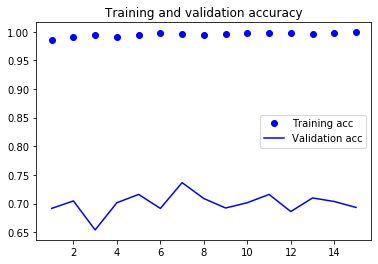

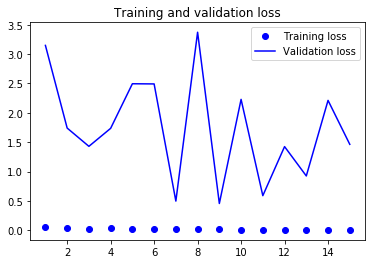

In [10]:
# 훈련 데이터와 검증 데이터에 대한 손실과 정확도를 그래프로 

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LR을 0.001 > 0.0001로 변경 하니 더 성능이 안나온다. LR은 0.001로 두고 Data augumentation을 진행해본다.

In [11]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.RMSprop(lr=0.001),
             metrics=['accuracy'])

In [ ]:
# ImageDataGenerator 클래스: 디스크에 있는 이미지 파일을 전처리된 배치 텐서로 자동으로 바꾸어 주는 
# 파이썬 generator를 만들어 줌

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.7,
                                   zoom_range=[0.9, 2.2],
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

# 모든 이미지를 1/255 스케일로 조정합니다.
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    train_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

validation_generator = test_datagen.flow_from_directory(
    validation_dir, #train 타겟 디렉토리
    target_size =(150,150), # 모든 이미지를 150x150 크기로 바꿔줌
    batch_size=20,
    class_mode='categorical') # categorical 손실을 사용하기 때문에 멀티플 레이블이 필요함.

In [ ]:
history = model.fit_generator(
    train_generator,
#     steps_per_epoch=100, 
    steps_per_epoch=100, 
    
    # 케라스 모델에 하나의 epoch을 정의 하기 위해 제너레이터로 부터 얼마나 많은 샘플을 뽑을 것인가
    # step_per_epoch개의 배치 만큼 뽑은 후, 
    # 즉 steps_per_epoch 횟수만큼 경사 하강법 단계를 실행 한 후에 훈련 프로세스는 다음 에포크로 넘어감
    # 여기서는 20 샘플이(위애) 하나의 배치 이므로 250개의 데이터를 처리 할 때까지 15개의 배치를 뽑을 것
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50)

## 평가 - 테스트 데이터
마지막으로 테스트 데이터에서 이 모델을 평가하겠습니다.

In [ ]:
test_dir = './data/multiple/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='categorical'
)

In [ ]:
test_loss0, test_acc0 = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc0)